In [2]:
library(readr)
library(dplyr)
dat <- read_csv("CollegeMobility.csv")
head(dat)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“Missing column names filled in: 'X44' [44], 'X45' [45]”Parsed with column specification:
cols(
  .default = col_double(),
  name = col_character(),
  tier_name = col_character(),
  state = col_character(),
  czname = col_character(),
  X44 = col_logical(),
  X45 = col_logical()
)
See spec(...) for full column specifications.


super_opeid,name,type,tier,tier_name,iclevel,region,state,czname,par_q1,⋯,kq3_cond_parq4,kq4_cond_parq4,kq5_cond_parq4,kq1_cond_parq5,kq2_cond_parq5,kq3_cond_parq5,kq4_cond_parq5,kq5_cond_parq5,X44,X45
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
30955,ASA Institute Of Business & Computer Technology,3,11,Two-year for-profit,2,1,NY,New York,0.44357512,⋯,0.1760198,0.2858109,0.1156441,0.0962707,0.2985320,0.2036935,0.2042709,0.1972328,NA,NA
3537,Abilene Christian University,2,6,Selective private,1,3,TX,Abilene,0.05244135,⋯,0.1742201,0.2332917,0.3146711,0.1346296,0.1225604,0.1417430,0.2391946,0.3618724,NA,NA
1541,Abraham Baldwin Agricultural College,1,7,Nonselective four-year public,1,3,GA,Valdosta,0.15455518,⋯,0.2335978,0.3056518,0.2012344,0.1240982,0.1493977,0.1966711,0.3047610,0.2250720,NA,NA
7531,Academy Of Art University,3,10,Four-year for-profit,1,4,CA,San Francisco,0.09352422,⋯,0.1671838,0.1889049,0.2519145,0.1966253,0.1850919,0.1701652,0.1515126,0.2966050,NA,NA
1345,Adams State University,1,5,Selective public,1,4,CO,Alamosa,0.12922439,⋯,0.2277163,0.2919978,0.2034337,0.1050013,0.1181480,0.2660201,0.2192669,0.2915637,NA,NA
2666,Adelphi University,2,6,Selective private,1,1,NY,New York,0.08704802,⋯,0.1625158,0.1900162,0.4280847,0.1032917,0.1018200,0.1185716,0.1900711,0.4862457,NA,NA


In [3]:
dset <- unique(dat[,c("super_opeid","name","type","tier","tier_name","iclevel","region","state","czname")])
head(dset)

super_opeid,name,type,tier,tier_name,iclevel,region,state,czname
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
30955,ASA Institute Of Business & Computer Technology,3,11,Two-year for-profit,2,1,NY,New York
3537,Abilene Christian University,2,6,Selective private,1,3,TX,Abilene
1541,Abraham Baldwin Agricultural College,1,7,Nonselective four-year public,1,3,GA,Valdosta
7531,Academy Of Art University,3,10,Four-year for-profit,1,4,CA,San Francisco
1345,Adams State University,1,5,Selective public,1,4,CO,Alamosa
2666,Adelphi University,2,6,Selective private,1,1,NY,New York


In [4]:
idx <- function(k, v1, v2, v3, v4, v5){
    a <- rowSums(cbind((1-k)*v1, (2-k)*v2, (3-k)*v3, (4-k)*v4, (5-k)*v5))
    return(a)
}

dset$mobility1 <- idx(1, dat$kq1_cond_parq1, dat$kq2_cond_parq1, dat$kq3_cond_parq1, dat$kq4_cond_parq1, dat$kq5_cond_parq1)
dset$mobility2 <- idx(2, dat$kq1_cond_parq2, dat$kq2_cond_parq2, dat$kq3_cond_parq2, dat$kq4_cond_parq2, dat$kq5_cond_parq2)
dset$mobility3 <- idx(3, dat$kq1_cond_parq3, dat$kq2_cond_parq3, dat$kq3_cond_parq3, dat$kq4_cond_parq3, dat$kq5_cond_parq3)
dset$mobility4 <- idx(4, dat$kq1_cond_parq4, dat$kq2_cond_parq4, dat$kq3_cond_parq4, dat$kq4_cond_parq4, dat$kq5_cond_parq4)
dset$mobility5 <- idx(5, dat$kq1_cond_parq5, dat$kq2_cond_parq5, dat$kq3_cond_parq5, dat$kq4_cond_parq5, dat$kq5_cond_parq5)
dset$mobility  <- rowSums(cbind(dset$mobility1,dset$mobility2,dset$mobility3,dset$mobility4,dset$mobility5))

head(dset)

super_opeid,name,type,tier,tier_name,iclevel,region,state,czname,mobility1,mobility2,mobility3,mobility4,mobility5,mobility
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30955,ASA Institute Of Business & Computer Technology,3,11,Two-year for-profit,2,1,NY,New York,1.584773,0.7737764,-0.2276384,-1.0343600,-1.892337,-0.7957861
3537,Abilene Christian University,2,6,Selective private,1,3,TX,Abilene,2.518216,1.2263793,0.2446637,-0.5531854,-1.428880,2.0071932
1541,Abraham Baldwin Agricultural College,1,7,Nonselective four-year public,1,3,GA,Valdosta,1.786050,1.0564324,0.2603396,-0.6441070,-1.642689,0.8160261
7531,Academy Of Art University,3,10,Four-year for-profit,1,4,CA,San Francisco,1.796664,1.0148164,0.0288504,-0.8986257,-1.833620,0.1080854
1345,Adams State University,1,5,Selective public,1,4,CO,Alamosa,2.013698,1.1726510,0.3264908,-0.6955311,-1.525756,1.2915529
2666,Adelphi University,2,6,Selective private,1,1,NY,New York,2.634732,1.6490488,0.7790028,-0.2609731,-1.145841,3.6559698


### Question 1. Does college education in the U.S. increase upward mobility of the younger generation?


	One Sample t-test

data:  dset$mobility
t = 37.836, df = 2198, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 1.438530 1.595801
sample estimates:
mean of x 
 1.517165 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


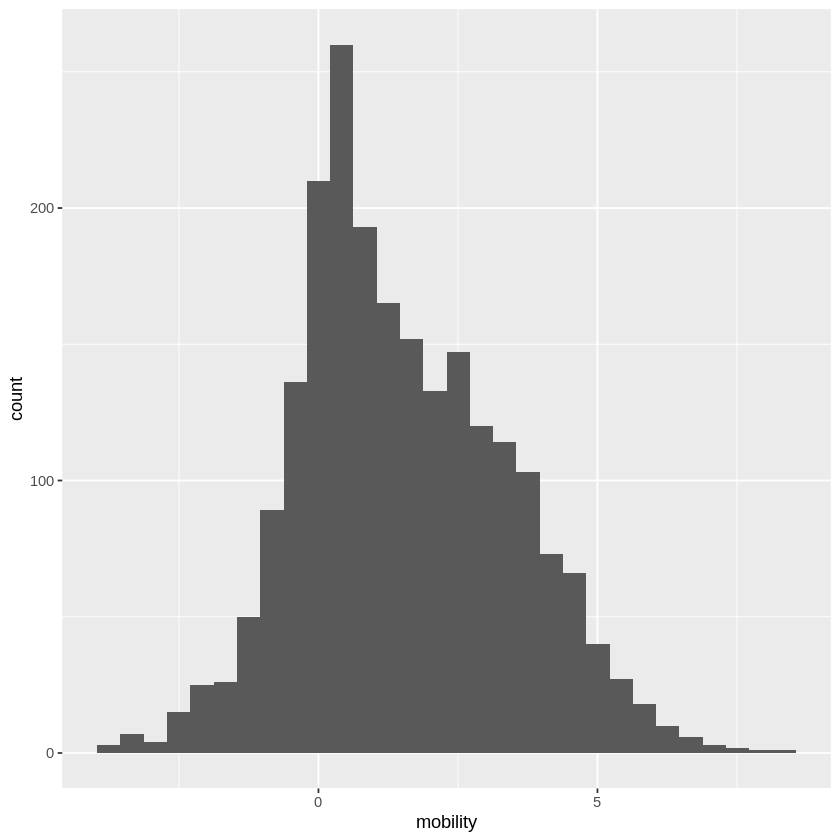

In [5]:
t.test(dset$mobility)

library(ggplot2)

ggplot(dset, aes(x = mobility)) +
  geom_histogram() 


	One Sample t-test

data:  dset$mobility1
t = 226.43, df = 2198, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 2.080865 2.117224
sample estimates:
mean of x 
 2.099045 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


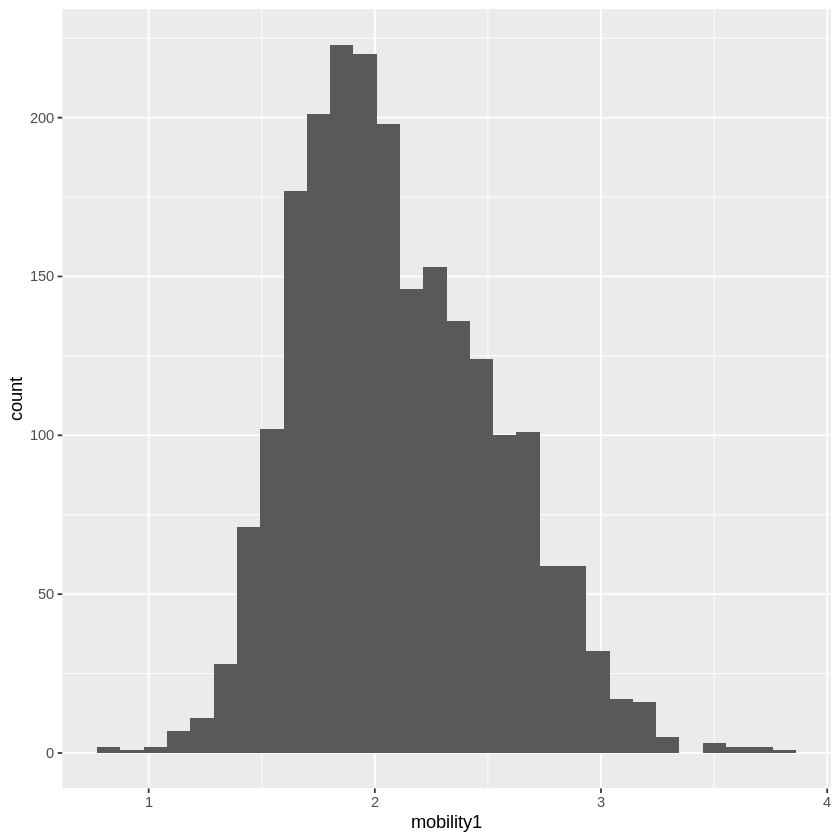

In [22]:
t.test(dset$mobility1)

library(ggplot2)

ggplot(dset, aes(x = mobility1)) +
  geom_histogram()

### Question 2. Does attending public or private colleges make a difference in terms of upward mobility?


	Welch Two Sample t-test

data:  public$mobility and private$mobility
t = -13.354, df = 1781.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.2154004 -0.9040999
sample estimates:
mean of x mean of y 
 1.030904  2.090655 


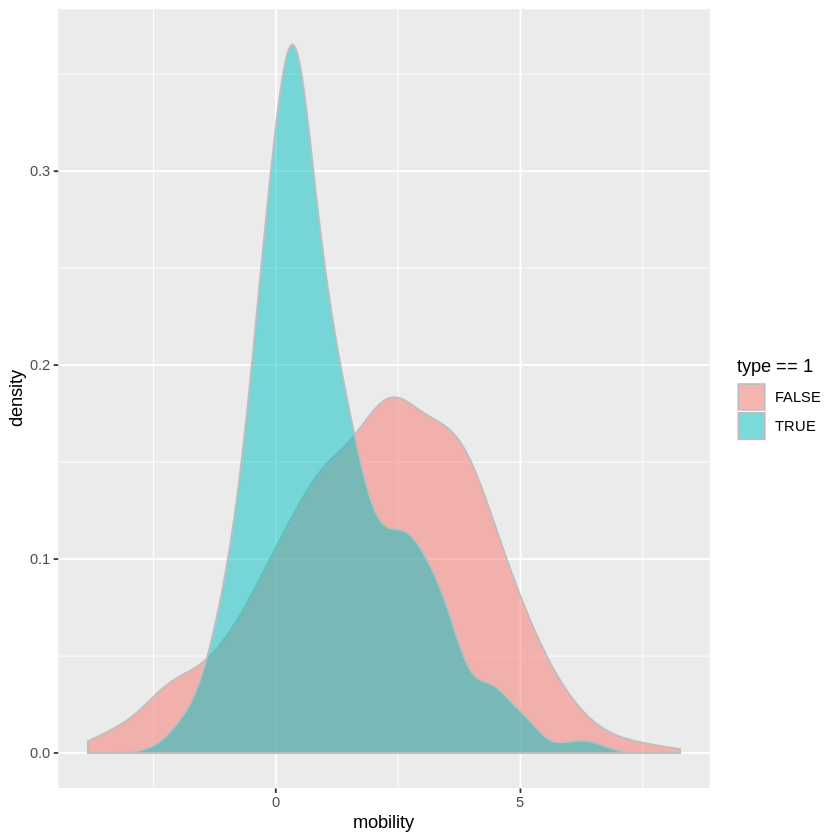

In [21]:

public <-filter(dset, type == 1)
private <-filter(dset, type != 1)

t.test(public$mobility,private$mobility)

ggplot(dset, aes(x = mobility, fill = type == 1)) +
  geom_density(alpha = 0.5, colour = "grey")


	Welch Two Sample t-test

data:  public$mobility1 and private$mobility1
t = -14.754, df = 1819.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3033791 -0.2321866
sample estimates:
mean of x mean of y 
 1.976174  2.243957 


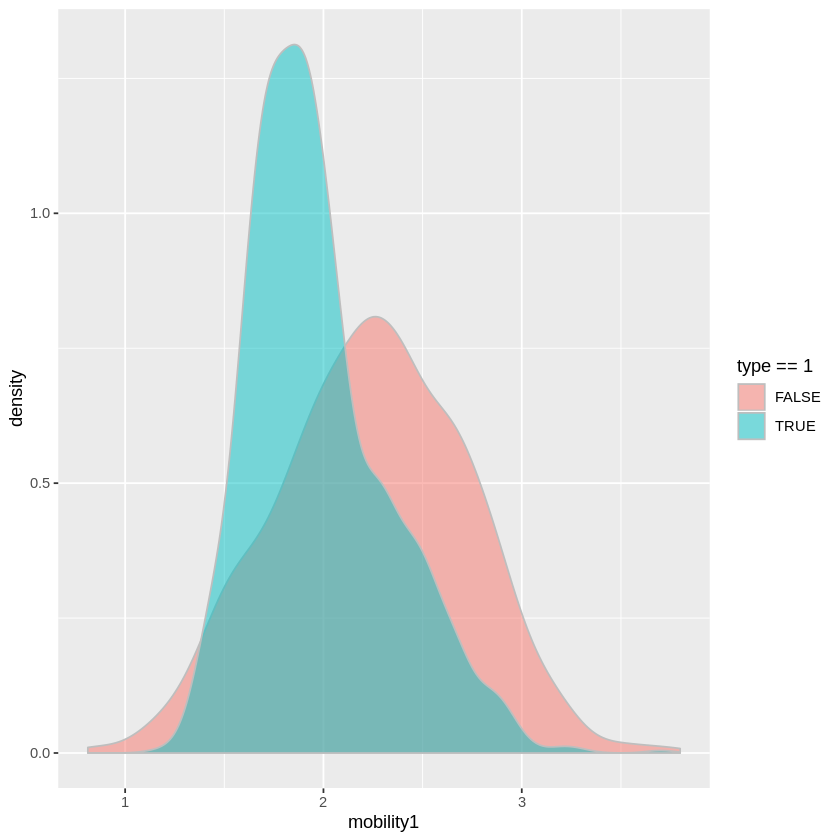

In [23]:
t.test(public$mobility1,private$mobility1)

ggplot(dset, aes(x = mobility1, fill = type == 1)) +
  geom_density(alpha = 0.5, colour = "grey")

### Question 3. Does attending lvy or other colleges make a difference in terms of upward mobility?

In [8]:
ivy <- filter(dset, tier == 1)
other_colleges <-filter(dset, tier != 1)


	Welch Two Sample t-test

data:  ivy$mobility and other_colleges$mobility
t = 26.734, df = 12.826, p-value = 1.248e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.600085 4.234028
sample estimates:
mean of x mean of y 
 5.412847  1.495790 


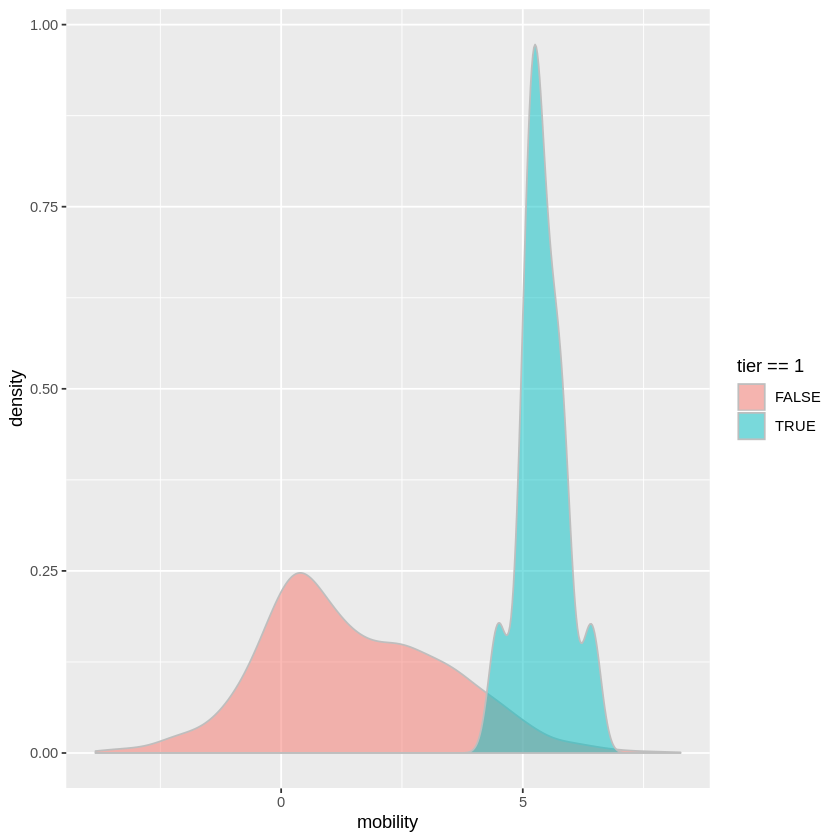

In [9]:
t.test(ivy$mobility,other_colleges$mobility)

ggplot(dset, aes(x = mobility, fill = tier == 1)) +
  geom_density(alpha = 0.5, colour = "grey")


	Welch Two Sample t-test

data:  ivy$mobility and dset$mobility
t = 26.575, df = 12.851, p-value = 1.293e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.578618 4.212745
sample estimates:
mean of x mean of y 
 5.412847  1.517165 


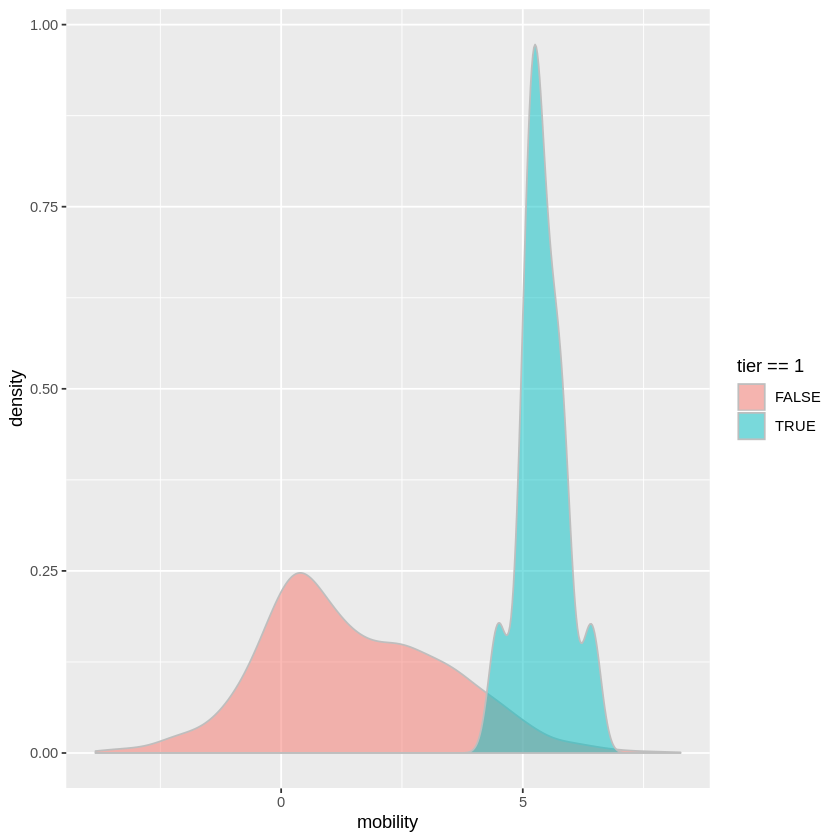

In [26]:
t.test(ivy$mobility,dset$mobility)
ggplot(dset, aes(x = mobility, fill = tier == 1)) +
  geom_density(alpha = 0.5, colour = "grey")


	Welch Two Sample t-test

data:  ivy$mobility1 and other_colleges$mobility1
t = 20.666, df = 12.245, p-value = 6.84e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.7467284 0.9223012
sample estimates:
mean of x mean of y 
 2.929005  2.094491 


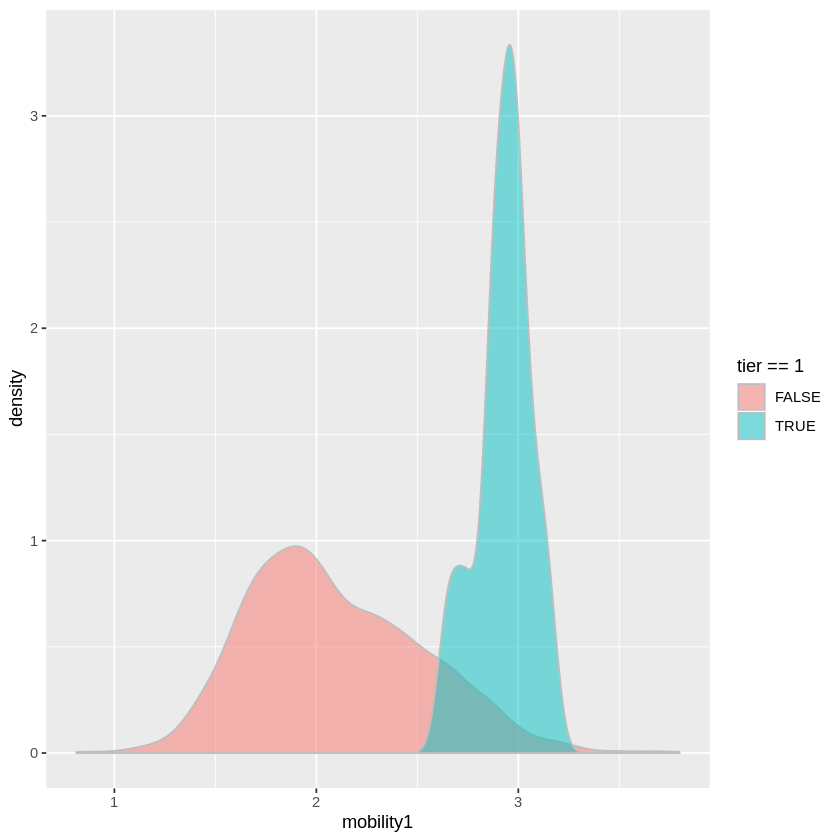

In [25]:
t.test(ivy$mobility1,other_colleges$mobility1)

ggplot(dset, aes(x = mobility1, fill = tier == 1)) +
  geom_density(alpha = 0.5, colour = "grey")

### Question 4. Does attending colleges in different regions (1 = Northeast, 2 = Midwest, 3 = South, 4 = West) makes a difference in terms of upward mobility?



Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”

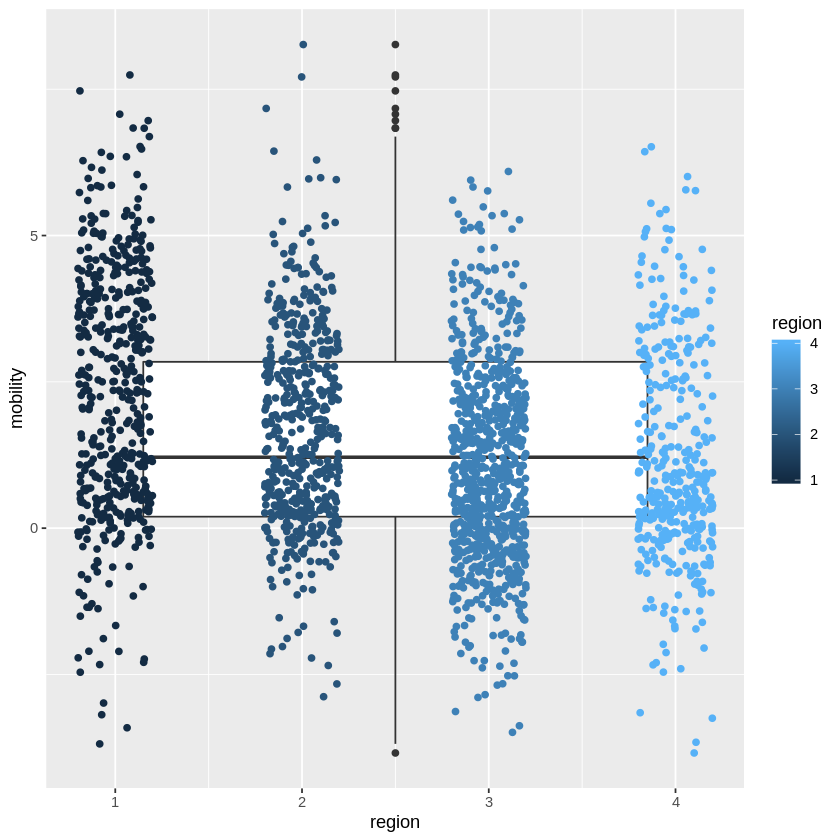

In [11]:
northeast <- filter(dset, region == 1)
midwest <- filter(dset, region == 2)
south <- filter(dset, region == 3)
west <- filter(dset, region == 4)


ggplot(dset, aes(y = mobility, x = region, fill = region)) +
  geom_boxplot(width = 0.2) + 
  geom_jitter(width = 0.2, aes(colour = region))


	Welch Two Sample t-test

data:  northeast$mobility and dset$mobility
t = 8.1874, df = 691.67, p-value = 1.286e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6309745 1.0290646
sample estimates:
mean of x mean of y 
 2.347185  1.517165 


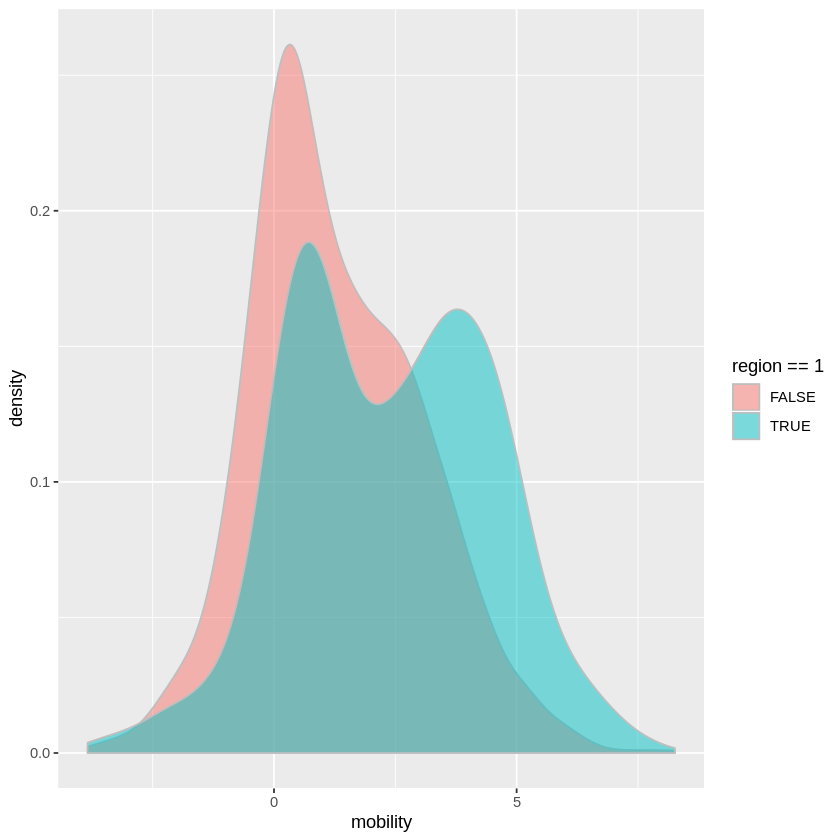

In [12]:
t.test(northeast$mobility,dset$mobility)

ggplot(dset, aes(x = mobility, fill = region == 1)) +
  geom_density(alpha = 0.5, colour = "grey")


	Welch Two Sample t-test

data:  south$mobility and dset$mobility
t = -6.5556, df = 1561.8, p-value = 7.508e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6113280 -0.3297507
sample estimates:
mean of x mean of y 
 1.046626  1.517165 


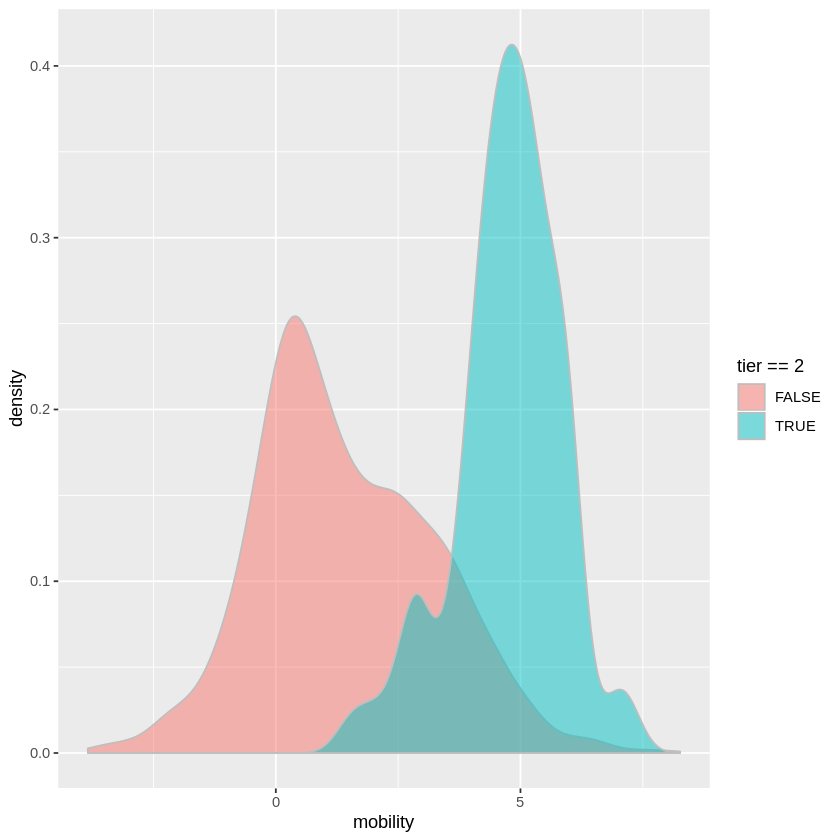

In [13]:
t.test(south$mobility,dset$mobility)

ggplot(dset, aes(x = mobility, fill = tier == 2)) +
  geom_density(alpha = 0.5, colour = "grey")


	Welch Two Sample t-test

data:  midwest$mobility and dset$mobility
t = 2.3694, df = 858.81, p-value = 0.01804
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0343677 0.3660716
sample estimates:
mean of x mean of y 
 1.717385  1.517165 



	Welch Two Sample t-test

data:  west$mobility and dset$mobility
t = -3.7104, df = 526.82, p-value = 0.0002289
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5794073 -0.1782594
sample estimates:
mean of x mean of y 
 1.138332  1.517165 


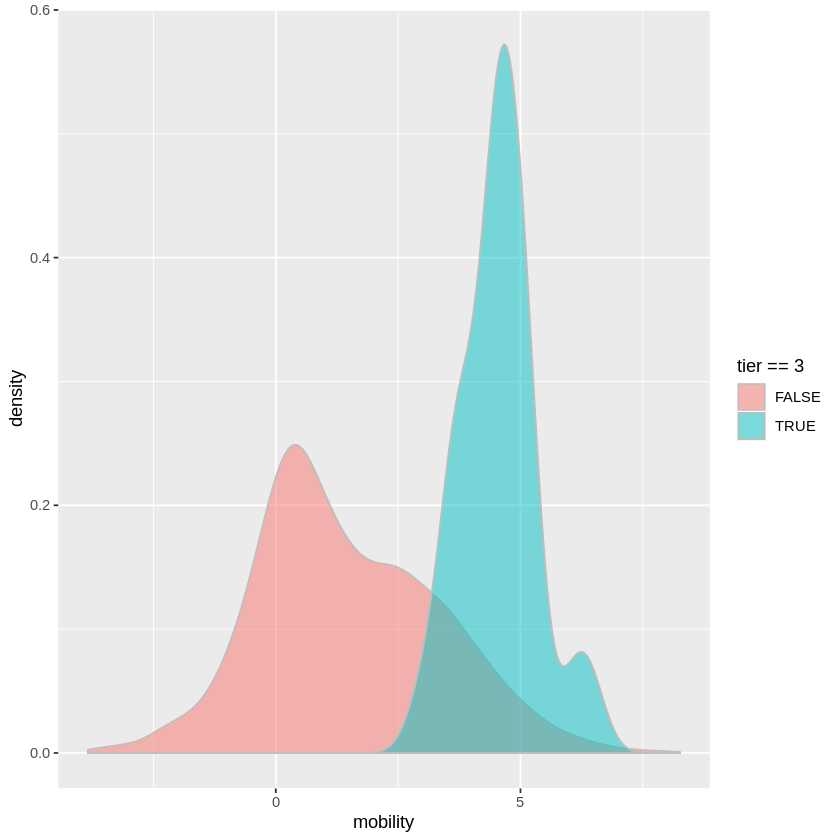

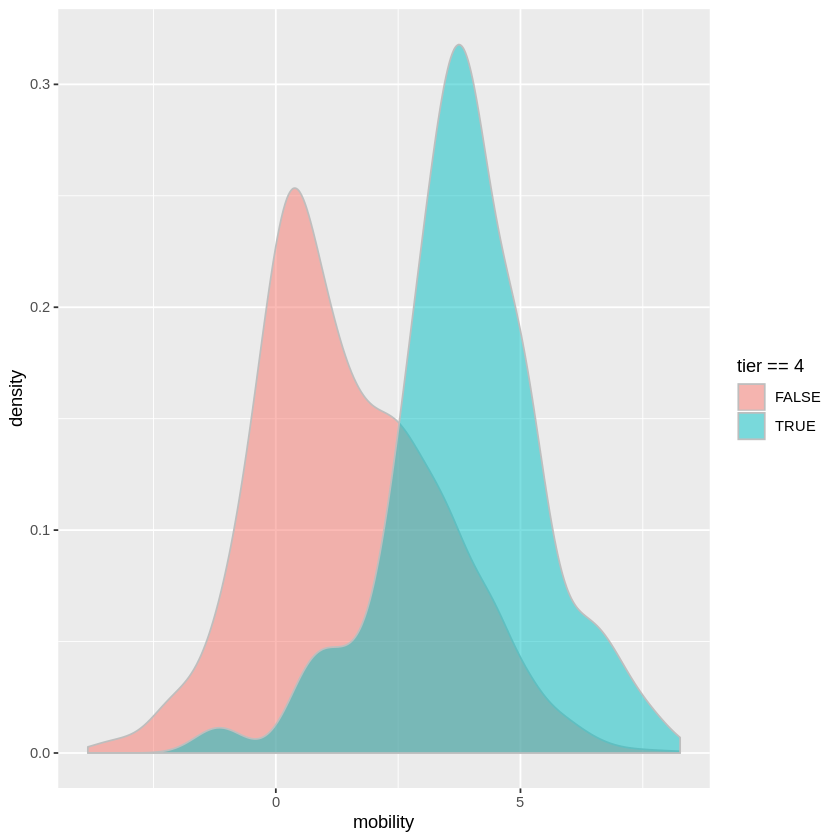

In [14]:
t.test(midwest$mobility,dset$mobility)
ggplot(dset, aes(x = mobility, fill = tier == 3)) +
  geom_density(alpha = 0.5, colour = "grey")

t.test(west$mobility,dset$mobility)
ggplot(dset, aes(x = mobility, fill = tier == 4)) +
  geom_density(alpha = 0.5, colour = "grey")

### Question 5. Does year-of-colleges (2-year, 4-year, less than 2 year) make a difference in terms of upward mobility?



In [15]:
fouryr <- filter(dset, iclevel == 1)
twoyr <-filter(dset, iclevel == 2)
lesstyr <-filter(dset, iclevel == 3)


In [29]:
t.test(twoyr$mobility,dset$mobility)
t.test(fouryr$mobility,dset$mobility)
t.test(lesstyr$mobility,dset$mobility)
t.test(twoyr$mobility1,dset$mobility1)
t.test(fouryr$mobility1,dset$mobility1)
t.test(lesstyr$mobility1,dset$mobility1)


	Welch Two Sample t-test

data:  twoyr$mobility and dset$mobility
t = -25.963, df = 2686.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.459064 -1.254151
sample estimates:
mean of x mean of y 
0.1605579 1.5171654 



	Welch Two Sample t-test

data:  fouryr$mobility and dset$mobility
t = 14.557, df = 3089.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.7723487 1.0127981
sample estimates:
mean of x mean of y 
 2.409739  1.517165 



	Welch Two Sample t-test

data:  lesstyr$mobility and dset$mobility
t = -15.247, df = 49.769, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.520811 -2.701073
sample estimates:
mean of x mean of y 
-1.593777  1.517165 



	Welch Two Sample t-test

data:  twoyr$mobility1 and dset$mobility1
t = -25.384, df = 2617.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3355313 -0.2874103
sample estimates:
mean of x mean of y 
 1.787574  2.099045 



	Welch Two Sample t-test

data:  fouryr$mobility1 and dset$mobility1
t = 13.989, df = 3045.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1725384 0.2287882
sample estimates:
mean of x mean of y 
 2.299708  2.099045 



	Welch Two Sample t-test

data:  lesstyr$mobility1 and dset$mobility1
t = -12.131, df = 49.526, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6882931 -0.4927127
sample estimates:
mean of x mean of y 
 1.508542  2.099045 


### Question 6 Does attending colleges in different states (RI versus other state) make a difference in terms of upward mobility?

In [17]:
RhodeIsland <- filter(dset, state == "RI")
RhodeIsland

super_opeid,name,type,tier,tier_name,iclevel,region,state,czname,mobility1,mobility2,mobility3,mobility4,mobility5,mobility
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3401,Brown University,2,1,Ivy Plus,1,1,RI,Providence,2.949877,1.9949354,0.94151463,0.09444714,-0.9350934,5.0456809
3402,Bryant University,2,6,Selective private,1,1,RI,Providence,3.090899,2.0278108,1.30131055,0.39803573,-0.5391673,6.2788887
3408,Community College Of Rhode Island,1,9,Two-year (public and private not-for-profit),2,1,RI,Providence,1.769052,0.9408765,0.03970000,-0.79397914,-1.7699451,0.1857043
3404,Johnson & Wales University,2,6,Selective private,1,1,RI,Providence,2.042767,1.2027921,0.33478274,-0.56846913,-1.4688406,1.5430324
7845,New England Institute Of Technology,2,8,Nonselective four-year private not-for-profit,1,1,RI,Providence,2.066027,1.3026956,0.41978918,-0.40590076,-1.2560159,2.1265954
3406,Providence College,2,4,Highly selective private,1,1,RI,Providence,2.680656,2.0432909,1.22501522,0.14296959,-0.7181167,5.3738154
3407,Rhode Island College,1,5,Selective public,1,1,RI,Providence,2.279001,1.5543389,0.46662120,-0.31018940,-1.3102312,2.6795404
3409,Rhode Island School Of Design,2,8,Nonselective four-year private not-for-profit,1,1,RI,Providence,2.135780,1.4620045,0.19490194,-0.61250229,-1.5591927,1.6209913
3410,Roger Williams University,2,6,Selective private,1,1,RI,Providence,2.455235,1.8542605,0.83610862,-0.13190032,-1.0858555,3.9278486


In [18]:
t.test(RhodeIsland$mobility,dset$mobility)


	Welch Two Sample t-test

data:  RhodeIsland$mobility and dset$mobility
t = 2.739, df = 11.107, p-value = 0.01911
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3121819 2.8512680
sample estimates:
mean of x mean of y 
 3.098890  1.517165 


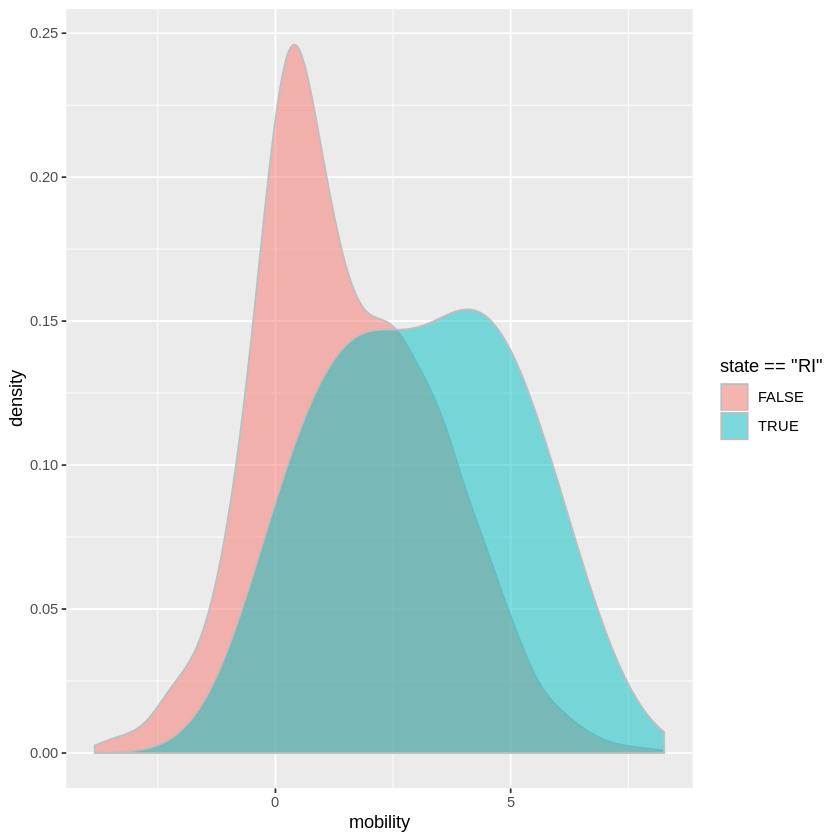

In [19]:
ggplot(dset, aes(x = mobility, fill = state == "RI")) +
  geom_density(alpha = 0.5, colour = "grey")